In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

target_index = {target_name:idx for idx,target_name in enumerate(iris['target_names'])}
targets = iris['target']
versicolor_indice = (targets == target_index['versicolor'])
setosa_indice = (targets == target_index['setosa'])
target_indice = versicolor_indice + setosa_indice

# Choose petal length and width.
X = iris['data'][target_indice, 2:]
y = iris['target'][target_indice]

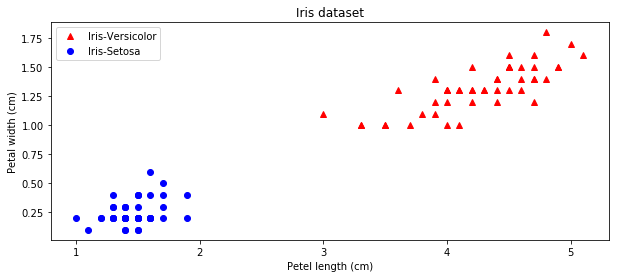

In [3]:
import matplotlib.pyplot as plt

versicolor_indice = (y == target_index['versicolor'])
setosa_indice = (y == target_index['setosa'])

plt.figure('Iris dataset', figsize=(10, 4))
plt.title('Iris dataset')
plt.plot(X[versicolor_indice, 0], X[versicolor_indice, 1], 'r^', label='Iris-Versicolor')
plt.plot(X[setosa_indice, 0], X[setosa_indice, 1], 'bo', label='Iris-Setosa')
plt.xlabel('Petel length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.show()

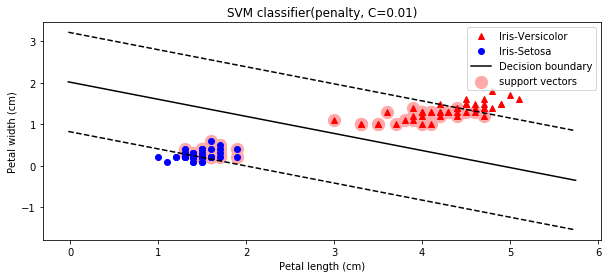

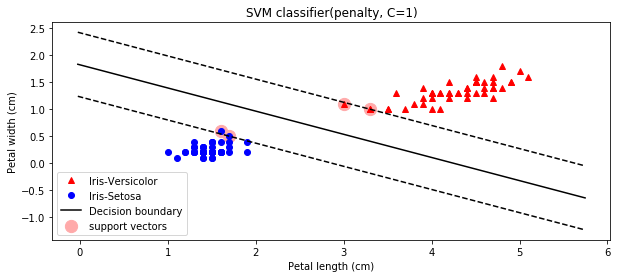

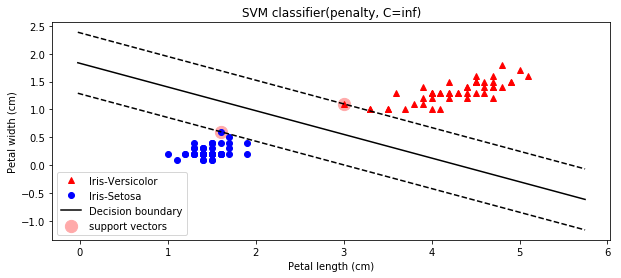

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Binary classifier, linear SVM

for penalty in [0.01, 1, float('inf')]:
    binary_classifier = Pipeline([
        ('std-scaler', StandardScaler()),
        #('linear-svc', LinearSVC(C=1, loss='hinge'))
        ('linear-svc', SVC(kernel='linear', C=penalty))
    ])
    binary_classifier.fit(X, y)
    
    svm_classifier = binary_classifier.named_steps['linear-svc']
    
    # Linear equation, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    w0, w1 = svm_classifier.coef_[0]
    b = svm_classifier.intercept_[0]

    x0 = np.linspace(-2, 2, 300)
    decision_boundary = -w0/w1 * x0 - b/w1

    margin = 1/w1
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    sv = svm_classifier.support_vectors_
    
    scaler = binary_classifier.named_steps['std-scaler']
    sv = scaler.inverse_transform(sv)
    decision_boundary = scaler.inverse_transform(np.c_[x0, decision_boundary])
    gutter_up = scaler.inverse_transform(np.c_[x0, gutter_up])
    gutter_down = scaler.inverse_transform(np.c_[x0, gutter_down])
    
    title = 'SVM classifier(penalty, C=%s)' % penalty
    plt.figure(title, figsize=(10,4))
    plt.title(title)
    # Draw samples.
    plt.plot(X[versicolor_indice, 0], X[versicolor_indice, 1], 'r^', label='Iris-Versicolor')
    plt.plot(X[setosa_indice, 0], X[setosa_indice, 1], 'bo', label='Iris-Setosa')
    # Draw support vectors that samples on the boundary.
    plt.scatter(sv[:,0], sv[:,1], s=150, facecolors='#FFAAAA', label='support vectors')
    # Draw boundary decision and margin lines.
    plt.plot(decision_boundary[:,0], decision_boundary[:,1], 'k', label='Decision boundary')
    plt.plot(gutter_up[:,0], gutter_up[:,1], 'k--')
    plt.plot(gutter_down[:,0], gutter_down[:,1], 'k--')
    plt.xlabel('Petal length (cm)')
    plt.ylabel('Petal width (cm)')
    plt.legend()
    plt.show()